In [1]:
import numpy as np
import matplotlib.pyplot as plt

import distributions as dist
import diagnostics as diag
import MetropolisHastings as mh
import langevin as lan
import hamiltonian as ham

Text(0.5, 1.0, 'Disjoint Multimodal Gaussian Distribution')

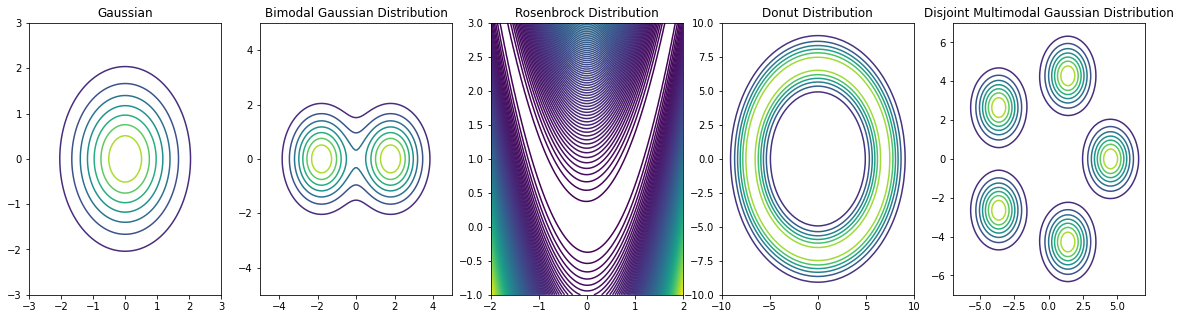

In [2]:
#Test distributions
#####################################################

#Gaussian
gaussian = dist.Gaussian(np.array([0,0]), np.diag([1,1]))

X = np.linspace(-3,3,100)
Y = np.linspace(-3,3,100)
z = [[gaussian([x,y]) for x in X] for y in Y]

plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.contour(X,Y,z)
plt.title('Gaussian')

#Multimodal
double = dist.Multimodal(2,offset=.8)

X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
z = [[double([x,y]) for x in X] for y in Y]

plt.subplot(1,5,2)
plt.contour(X,Y,z)
plt.title('Bimodal Gaussian Distribution')

#Banana
banana = dist.Banana()

X = np.linspace(-2,2,100)
Y = np.linspace(-1,3,100)
z = [[banana([x,y]) for x in X] for y in Y]

plt.subplot(1,5,3)
plt.contour(X,Y,z,200)
plt.title('Rosenbrock Distribution')

#Donut
donut = dist.Donut()

X = np.linspace(-10,10,100)
Y = np.linspace(-10,10,100)
z = [[donut([x,y]) for x in X] for y in Y]

plt.subplot(1,5,4)
plt.contour(X,Y,z)
plt.title('Donut Distribution')

#Multimodal
multimodal = dist.Multimodal(5,offset=3.5)

X = np.linspace(-7,7,100)
Y = np.linspace(-7,7,100)
z = [[multimodal([x,y]) for x in X] for y in Y]

plt.subplot(1,5,5)
plt.contour(X,Y,z)
plt.title('Disjoint Multimodal Gaussian Distribution')

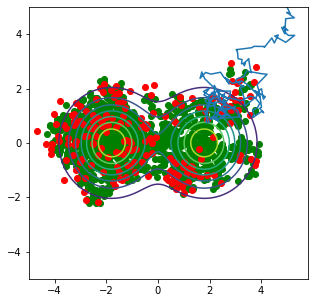

In [3]:
#Test Metropolis Hastings
metropolis = mh.MetropolisHastings(np.array([5,5]), double, burn=200)
burn, samples, accepted, rejected = metropolis(2000, all=True)

#Gaussian
X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
z = [[double([x,y]) for x in X] for y in Y]

plt.figure(figsize=(5,5))
plt.contour(X,Y,z)
plt.plot(burn[:,0], burn[:,1])

plt.scatter(samples[accepted,0], samples[accepted,1], color='g')
plt.scatter(samples[rejected,0], samples[rejected,1], color='r')

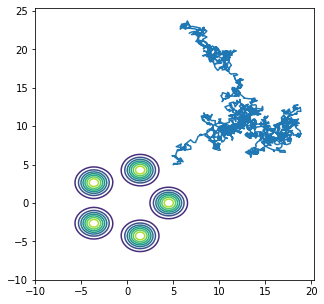

In [4]:
#Test Langevin MCMC
langevin = lan.LangevinMonteCarlo(np.array([5,5]), multimodal, tau=.1, burn=2000)
burn, samples = langevin(2000, all=True)

###IF GRAD >> NOISE

#Gaussian
X = np.linspace(-10,10,100)
Y = np.linspace(-10,10,100)
z = [[multimodal([x,y]) for x in X] for y in Y]

plt.figure(figsize=(5,5))
plt.contour(X,Y,z)
plt.plot(burn[:,0], burn[:,1])

plt.plot(samples[:,0], samples[:,1], color='g')

90.67184897279289


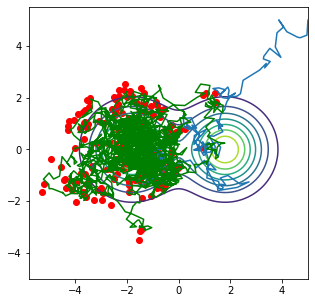

In [5]:
#Test Metropolis Adjusted Langevin
mala = lan.LangevinMonteCarlo(np.array([5,5]), double, burn=200, tau=.01, MALA=True)
burn, samples, accepted, rejected = mala(2000, all=True)
acc = len(accepted)
rej = len(rejected)
print(100 * acc / (acc + rej))

###AVERAGE PERFORMANCE METRIC

#Gaussian
X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
z = [[double([x,y]) for x in X] for y in Y]

plt.figure(figsize=(5,5))
plt.contour(X,Y,z)
plt.plot(burn[:,0], burn[:,1])

plt.plot(samples[accepted,0], samples[accepted,1], color='g')
plt.scatter(samples[rejected,0], samples[rejected,1], color='r')

89.39478067740144


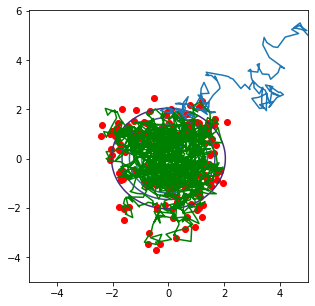

In [6]:
#Test Metropolis Adjusted Langevin
mala = lan.LangevinMonteCarlo(np.array([5,5]), gaussian, burn=200, tau=.01, MALA=True)
burn, samples, accepted, rejected = mala(2000, all=True)
acc = len(accepted)
rej = len(rejected)
print(100 * acc / (acc + rej))

###AVERAGE PERFORMANCE METRIC

#Gaussian
X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
z = [[gaussian([x,y]) for x in X] for y in Y]

plt.figure(figsize=(5,5))
plt.contour(X,Y,z)
plt.plot(burn[:,0], burn[:,1])

plt.plot(samples[accepted,0], samples[accepted,1], color='g')
plt.scatter(samples[rejected,0], samples[rejected,1], color='r')

93.61465852304275


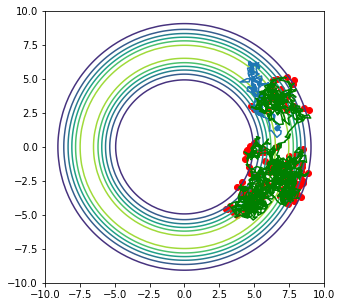

In [7]:
#Test Metropolis Adjusted Langevin
mala = lan.LangevinMonteCarlo(np.array([5,5]), donut, burn=200, tau=.01, MALA=True)
burn, samples, accepted, rejected = mala(2000, all=True)
acc = len(accepted)
rej = len(rejected)
print(100 * acc / (acc + rej))

###AVERAGE PERFORMANCE METRIC

#Gaussian
X = np.linspace(-10,10,100)
Y = np.linspace(-10,10,100)
z = [[donut([x,y]) for x in X] for y in Y]

plt.figure(figsize=(5,5))
plt.contour(X,Y,z)
plt.plot(burn[:,0], burn[:,1])

plt.plot(samples[accepted,0], samples[accepted,1], color='g')
plt.scatter(samples[rejected,0], samples[rejected,1], color='r')

89.72792892837313


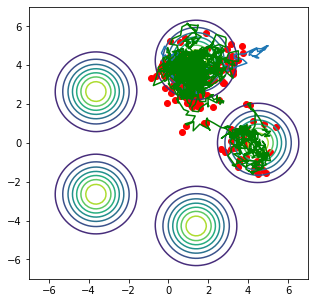

In [8]:
#Test Metropolis Adjusted Langevin
mala = lan.LangevinMonteCarlo(np.array([5,5]), multimodal, burn=200, tau=.01, MALA=True)
burn, samples, accepted, rejected = mala(2000, all=True)
acc = len(accepted)
rej = len(rejected)
print(100 * acc / (acc + rej))

###AVERAGE PERFORMANCE METRIC

#Gaussian
X = np.linspace(-7,7,100)
Y = np.linspace(-7,7,100)
z = [[multimodal([x,y]) for x in X] for y in Y]

plt.figure(figsize=(5,5))
plt.contour(X,Y,z)
plt.plot(burn[:,0], burn[:,1])

plt.plot(samples[accepted,0], samples[accepted,1], color='g')
plt.scatter(samples[rejected,0], samples[rejected,1], color='r')

In [9]:
#Test Metropolis Adjusted Langevin
donutham = ham.HamiltonianMonteCarlo(np.array([5,5]), donut, burn=200, tau=.01)
dh_burn, dh_samples, dh_accepted, dh_rejected = donutham(2000, all=True)

#Gaussian
X = np.linspace(-10,10,100)
Y = np.linspace(-10,10,100)
z = [[donut([x,y]) for x in X] for y in Y]

plt.figure(figsize=(5,5))
plt.contour(X,Y,z)
plt.plot(dh_burn[:,0], dh_burn[:,1])

plt.plot(dh_samples[dh_accepted,0], dh_samples[dh_accepted,1], color='g')
plt.scatter(dh_samples[dh_rejected,0], dh_samples[dh_rejected,1], color='r')

1
11
12
11
23
11
34
11
45
11
56
11
67
11
78
11
89
11
100
11
111
11
122
11
133
11
144
11
155
11
166
11
177
11
188
11
199
11
210
11
221
11
232
11
243
11
254
11
265
11
276
11
287
11
298
11
309
11
320
11
331
11
342
11
353
11
364
11
375
11
386
11
397
11
408
11
419
11
430
11
441
11
452
11
463
11
474
11
485
11
496
11
507
11
518
11
529
11
540
11
551
11
562
11
573
11
584
11
595
11
606
11
617
11
628
11
639
11
650
11
661
11
672
11
683
11
694
11
705
11
716
11
727
11
738
11
749
11
760
11
771
11
782
11
793
11
804
11
815
11
826
11
837
11
848
11
859
11
870
11
881
11
892
11
903
11
914
11
925
11
936
11
947
11
958
11
969
11
980
11
991
11
1002
11
1013
11
1024
11
1035
11
1046
11
1057
11
1068
11
1079
11
1090
11
1101
11
1112
11
1123
11
1134
11
1145
11
1156
11
1167
11
1178
11
1189
11
1200
11
1211
11
1222
11
1233
11
1244
11
1255
11
1266
11
1277
11
1288
11
1299
11
1310
11
1321
11
1332
11
1343
11
1354
11
1365
11
1376
11
1387
11
1398
11
1409
11
1420
11
1431
11
1442
11
1453
11
1464
11
1475
11
1486
11
1497
11
1508


/Users/anthonybugatto/Desktop/School/Spring 2022/Baysean Computing/Langevin-Hamiltonian/hamiltonian.py:44: RuntimeWarning: divide by zero encountered in true_divide
  if q is not None: return -self.target.grad(q).T / self.target(q)
/Users/anthonybugatto/Desktop/School/Spring 2022/Baysean Computing/Langevin-Hamiltonian/hamiltonian.py:40: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.target(q)) + .5 * np.dot(p, p)


AttributeError: 'numpy.ndarray' object has no attribute 'extend'